<a href="https://colab.research.google.com/github/ECV21/Course-Data-Analysis-with-Python-FreeCodeCamp/blob/main/Data_Cleaning_FreeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Missing Data

what does "missing data" mean? What is a missing value? It's depends on the origin of the data and the context it was generated. For example, for a survey, a SALARY field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy".

In [ ]:
#impot libraries

import pandas as pd
import numpy as np

In [ ]:
#For python, all these values are considered "falsy"
falsy_values = (0, False, None, '', [], {})
print(falsy_values)

(0, False, None, '', [], {})


In [ ]:
any(falsy_values)

False

In [ ]:
#Numpy has a special "nullable" value for numbers which is p.nan. It's NaN: "Not a Number"

np.nan

nan

In [ ]:
#The np.nan value is kind of a virus. Everything that it touches becomes np.nan

3 + np.nan

nan

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [ ]:
a.sum() #All elements will become nan

nan

In [ ]:
a.mean() #nan will be ignored

nan

In [ ]:
#nan is better tha regular NONE values, which in the previous examples would have rasied an exception:
3 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
#For numerical array, the NONE value is replaced by np.nan

a = np.array([1, 2, 3, np.nan, None, 4], dtype="float")
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [ ]:
#As we said, np.nan is like a virus. If you have any NAN value in an array
# and you try to perform an operation on it, you'll get unexpected results:
a.mean()

nan

In [ ]:
a.sum()

nan

In [ ]:
#Numpy also supports an "infinite" type:

np.inf

inf

In [ ]:
#which also behaves as a virus:

3 + np.inf

inf

In [ ]:
np.inf / 3

inf

In [ ]:
np.inf / np.inf

nan

In [ ]:

b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=float)

In [ ]:
b.sum()

nan

#Checking for NAN or INF

There are two functions: np.isnan and np.isinf that will perform the desired checks

In [ ]:
#Checking for NAN
np.isnan(np.nan)

True

In [ ]:
#checking for INF
np.isinf(np.inf)

True

In [ ]:
#and the joint operation can be performed with np.isfinite

np.isfinite(np.inf), np.isfinite(np.nan)

(False, False)

In [ ]:
#np.isnan and np.isinf also take arrays as inputs, and return boolean arrays as results:
np.isnan([1, 2, 3, np.nan, np.inf, 4])

array([False, False, False,  True, False, False])

In [ ]:
np.isinf([1, 2, 3, np.nan, np.inf, 4])

array([False, False, False, False,  True, False])

In [ ]:
np.isfinite([1, 2, 3, np.nan, np.inf, 4])

array([ True,  True,  True, False, False,  True])

#Filtering them out

Whenever you're trying to perform an operation with numpy array and you know there might be missing values, you'll need to filter them out before proceeding, to avoid NAN propagation. We'll use a combination of the previous np.isnan + boolean arrays for this purpose:

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [ ]:
#It returns a new array that contains only the non-NaN elements of a
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [ ]:
#which is equivalent to:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [ ]:
#and whit that result, all the operation can be now performed:

a[np.isfinite(a)].sum()

10.0

In [ ]:
a[np.isfinite(a)].mean()

2.5

#Handling missing data with pandas

Pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values

In [ ]:
#import libraries
import pandas as pd
import numpy as np



#Pandas utility functions

Similarly to numpy, pandas also has a few utility functions to identify and detect null values:

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

In [ ]:
#The opposite ones also exist:

pd.notnull(None)

False

In [ ]:
pd.notnull(np.nan)

False

In [ ]:
pd.notna(np.nan)

False

In [ ]:
pd.notnull(1)

True

In [ ]:
#These functions also work with Series and DataFrame

pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
#dataframe

pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


#Pandas

Pandas manages missing values more gracefully than numpy. NANs will no longer behave as "viruses", and operations will just ignore them completely

In [ ]:
pd.Series([1, 2, np.nan]).count()

2

In [ ]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [ ]:
pd.Series([1, 2, np.nan]).mean()

1.5

##Filtering missing data

As we saw with numpy, we could combine boolean selection + pd.isnull to filter out those NAN and values:

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
#But both NOTNULL and ISNULL are also methods of Series and DAtaFRame's, sso we could use it that way:

s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s.notnull().sum()

4

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

#Dropping null values

Boolean selection + notnull() seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case we can use the DROPNA method

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

#Dropping null values on DataFrames

You saw how simple it is to drop NAs with a Series. But with DataFrames, there will be a few more things to consider, because ypu can't drop single values. You can only drop entire columns or rows.

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [ ]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [ ]:
#The default DROPNA behavior will drop all rows in which any null value is present

In [ ]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
#In this case we're dropping rows. Rows containing null values are dropped from the df.
#You can also use the AXIS parameter to drop columns containing null values:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
#dropping columns with NAN

df.dropna(axis=1)#axis="columns" also works

,Column D
0,5
1,8
2,34
3,110


In this case, any row or column that contains at least one null value will be dropped. Which can be, depending on the case, too extreme. You can control this behavior with the how parameter. Can be either 'any' or 'all':

In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [ ]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [ ]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.dropna(how='any')  #defaul behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
#You can also use the THRESH parameter to indicate a threshold
#(a minimum number) of non-null values for the row/columns to be kept

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
#If a row contains at least 3 non-NaN values, it will be kept.
#If a row contains fewer than 3 non-NaN values, it will be removed from the DataFrame.


df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [ ]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


#Filling null values

Sometimes insted than droping the null values, we might need to replace them with some other values. This highly depends on your context and the dataset you're currently working. Sometimes a NAN can be replaced with a 0, simetimes it can be replaced with the MEAN of the sample, and some other times you can take the closest value. Againg, it depends on the context.

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Filling null with a arbitrary values

In [ ]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [ ]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Filling nulls with contiguous (close) values

In [ ]:
#The method argument is used to full null values with other values close to that null one

s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [ ]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [ ]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

#Filling null values on DataFrames

The fillna method also works on DataFrames, and it works similarly. The main diferrences are that you can specify the axis (as usual, rows or columns) to use to fill the values (specially for methods) and that you have to more control on the values passed:

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [ ]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


#Checking if there are NAs

The question is: Does this Series or DataFrames contain any missing value? The answer should be yes or no: True or False. How can you verify it?

In [ ]:
#Example 1: Cheacking the length

#If there are missing values, s.dropna() will have less elements than s:

s.dropna().count()

4

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

In [ ]:
#There's also a count method, that excludes NANs from its resuls:

len(s)

6

In [ ]:
s.count()

4

In [ ]:
#So we could just do:

missing_values = s.count() != len(s)
missing_values

True

##More Pythonic solutions ANY

The methods ANY and ALL check if either there's ANY true value in a Series or ALL the values are TRUE.

In [ ]:
pd.Series([True, False, False]).any()

True

In [ ]:
pd.Series([True, False, False]).all()

False

In [ ]:
pd.Series([True, True, True]).all()

True

In [ ]:
#The isnull() method returned a Boolean SERIES with true values whenever there was a NAN

In [ ]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
#So we can just use the ANY method with the boolean array returned:

pd.Series([1, np.nan]).isnull().any()

True

In [ ]:
pd.Series([1, 2]).isnull().any()

False

In [ ]:
s.isnull().any()

True

In [ ]:
#A more strict version would check only the values of the Series:

In [ ]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [ ]:
s.isnull().values.any()

True

#Cleaning not-null values

After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like np.nan. The only thing you need to do is just use methods like isnull and fillna/dropna and pandas will take care of the rest.

But sometimes, you can have invalid values that are not just "missing data" (None, or nan).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous DataFrame doesn't have any "missing value", but clearly has invalid data. 290 doesn't seem like a valid age, and D and ? don't correpond with any known sex category.

##Finding unique values

The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present. For that, we use the unique() method:

In [ ]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
df['Sex'].value_counts()

Sex
F    2
M    1
D    1
?    1
Name: count, dtype: int64

Clearly if you see values like 'D' or '?', it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that 'D' was a typo and it should actually be F. You can use the replace function to replace these values:

In [ ]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few 'N's, that should actually be 'M's:

In [ ]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [ ]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, 150 > 15, 490 > 49).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [ ]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [ ]:
#And we can now just divide by 10:

df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [ ]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,29
4,?,25


#Duplicates

Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:

In [ ]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [ ]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are duplicated (that will tell you which values are duplicates) and drop_duplicates (which will just get rid of duplicates):

In [ ]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case duplicated didn't consider 'Kim Darroch', the first instance of the United Kingdom or 'Peter Wittig' as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the keep parameter:

In [ ]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", 'Kim Darroch' and 'Peter Wittig' (the first ambassadors of their countries) are considered duplicates, but 'Peter Westmacott' and 'Klaus Scharioth' are not duplicates. You can also choose to mark all of them as duplicates with keep=False:

In [ ]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [ ]:
#A similar method is drop_duplicates, which just excludes the duplicated values and also accepts the keep parameter:

ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

#Duplicates in DataFrame

Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [ ]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [ ]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
#we clearly see that Kobe is duplicated; but he appears with two different positions. What does duplicated say?

players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
#Again, conceptually, "duplicated" means "all the column values should be duplicates". We can customize this with the subset parameter:

players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
#And the same rules of keep still apply:

players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
#drop_duplicates takes the same parameters:

players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [ ]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


#Text Handling

Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

#Splitting Columns

In [ ]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [ ]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [ ]:
#You know that the single columns represent the values "year, Sex, Country and number
# of children", but it's all been grouped in the same column and separated by an
#underscore. Pandas has a convenient method named split that we can use in these situations:


df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [ ]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
df = df['Data'].str.split('_', expand=True)

In [ ]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [ ]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [ ]:
#contains takes a regex/pattern as first value, so we need to escape the ?
# symbol as it has a special meaning for these patterns. Regular letters don't need escaping:


df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [ ]:
#Removing blank spaces (like in 'US ' or 'I  T' can be achieved with strip (lstrip and rstrip also exist) or just replace:

df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [ ]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [ ]:
#As we said, replace and contains take regex patterns, which can make it easier to replace values in bulk:

df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'), regex=True)

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

#More visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Global API

In [2]:
x = np.arange(-10, 11)

Text(0, 0.5, 'Y axis')

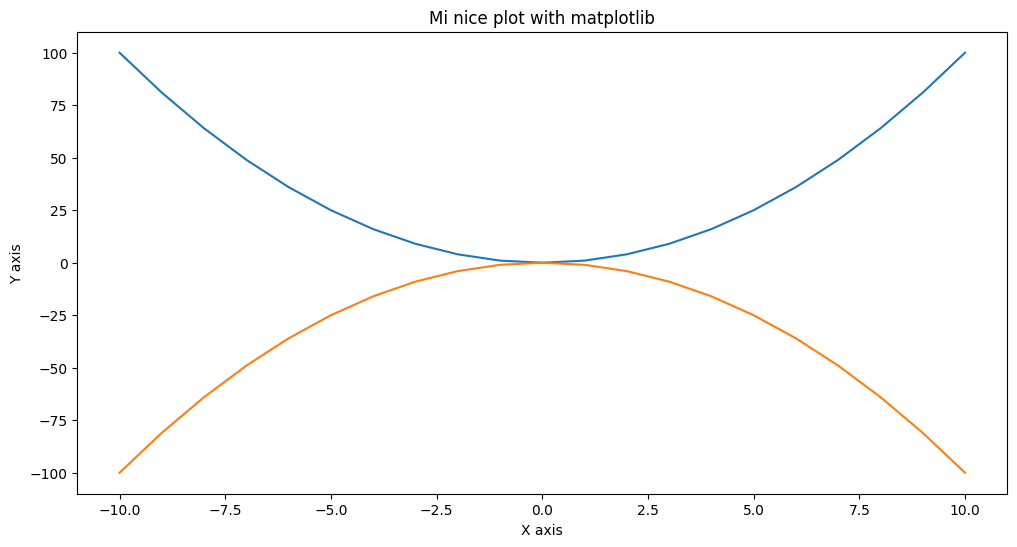

In [4]:
plt.figure(figsize=(12,6))

plt.title("Mi nice plot with matplotlib")
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))

plt.xlabel("X axis")
plt.ylabel("Y axis")

<ipython-input-5-43428853b8a3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # rows, columns, panel selected


Text(0, 0.5, 'X Squared')

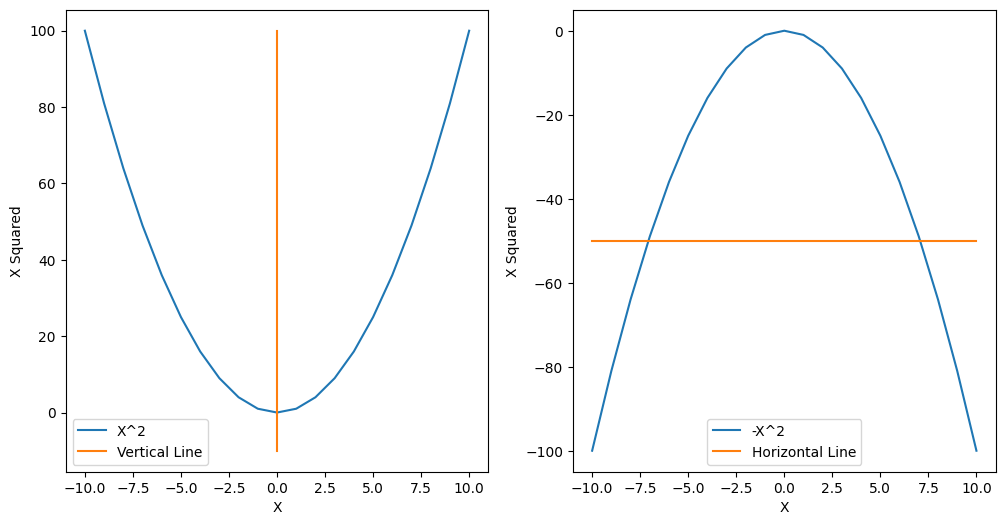

In [5]:
plt.figure(figsize=(12, 6)) #Tamaño de la figura
plt.title('My Nice Plot') # título del gráfico

#Crear el primer subplot (1 fila, 2 columnas, primer panel)
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2) #graficr x contra x^2 en el primer subplot
plt.plot([0, 0, 0], [-10, 0, 100]) #graficar una línea vertical en el primer subplot
plt.legend(['X^2', 'Vertical Line']) #añadir leyenda al primer subplot
plt.xlabel('X') #etiqueta del eje X del 1er subplot
plt.ylabel('X Squared') #Etiqueta del eje Y del 1er subplot

#Crear el segundo subplot (1 fila, 2 columnas, segundo panel)
plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

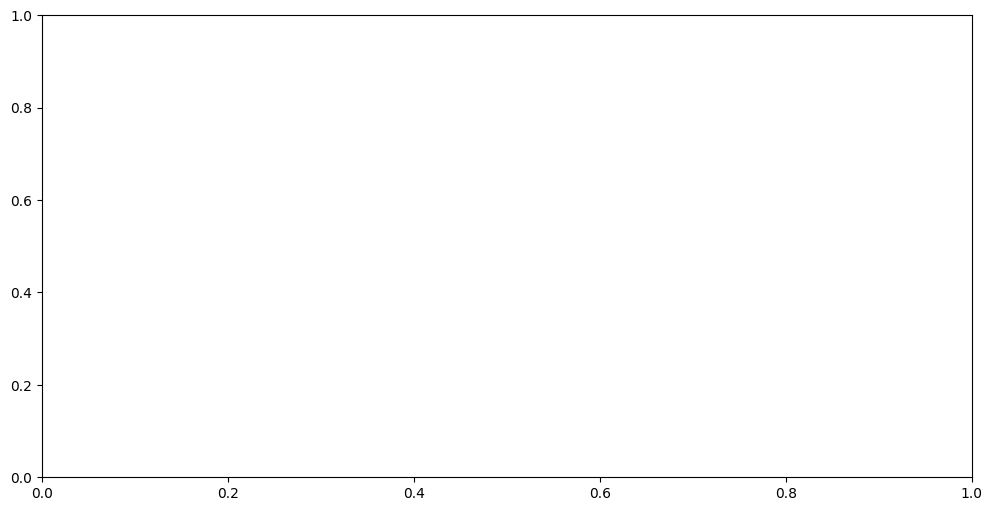

In [6]:
#OOP interface: configurar una figura con un tamaño de 12x6 pulgadas
# y obtener la figura (fig) como el objeto de los ejes (axes)

fig, axes = plt.subplots(figsize=(12,6))

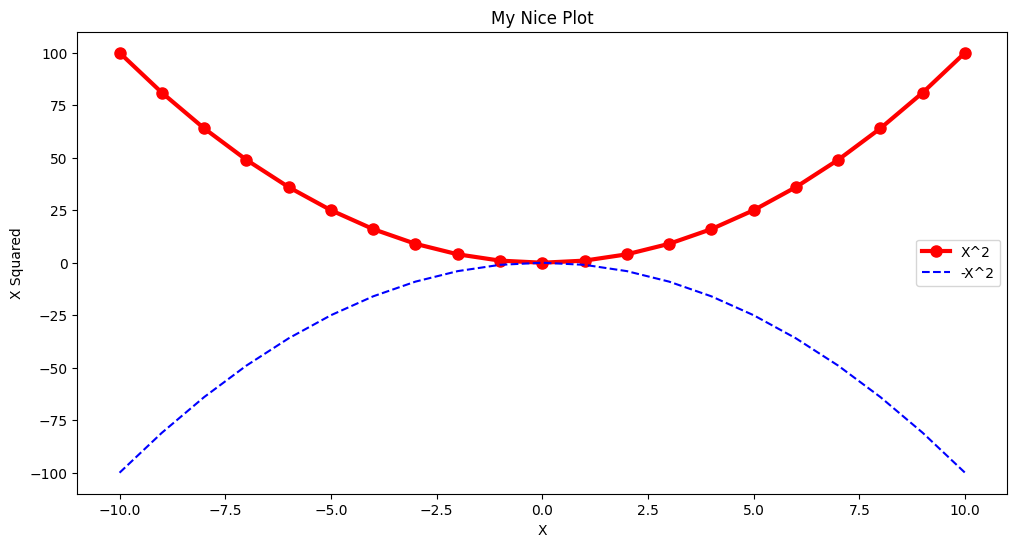

In [7]:
# Crear un gráfico con dos curvas diferentes en el mismo conjunot de eje

axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot with Different Line Styles')

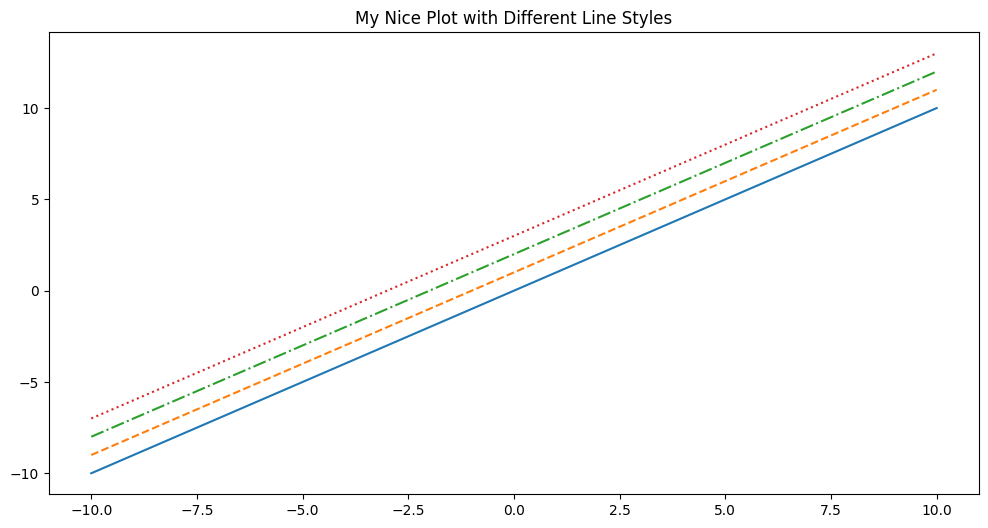

In [9]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot with Different Line Styles")

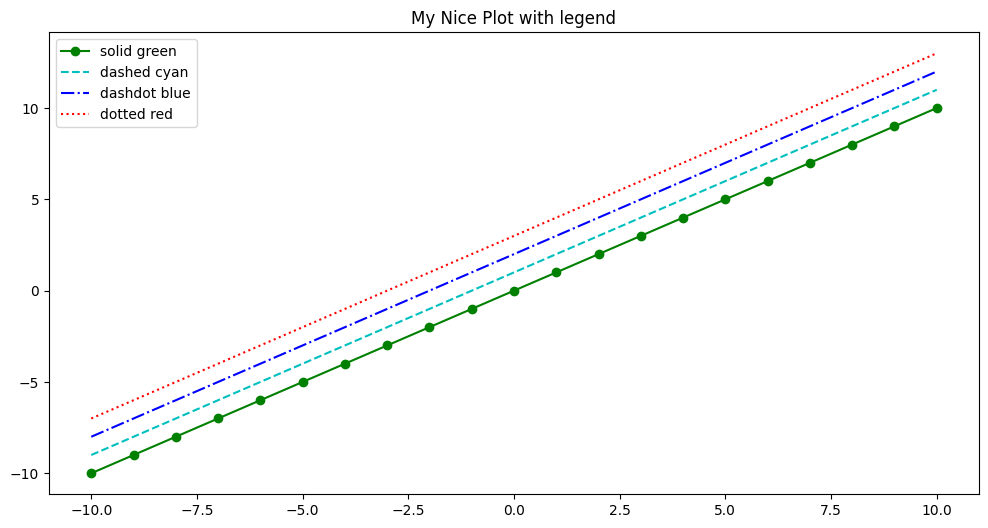

In [10]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot with legend")

axes.legend()

#Other types of plots

##Figueres and subfigures

when we call the "subplots()" function we get a tuple containing a FIGURE and ACES elements

(<Figure size 640x480 with 1 Axes>, <Axes: >)

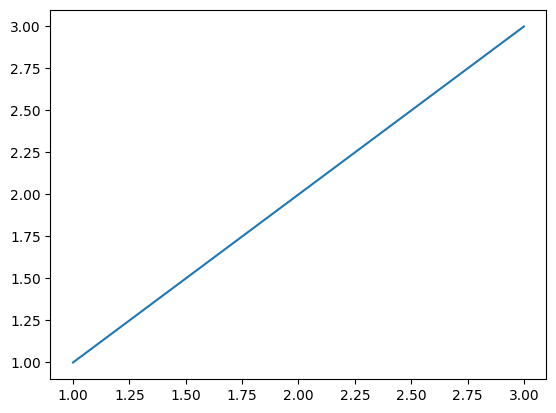

In [11]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the NROWS and NCOLS params.


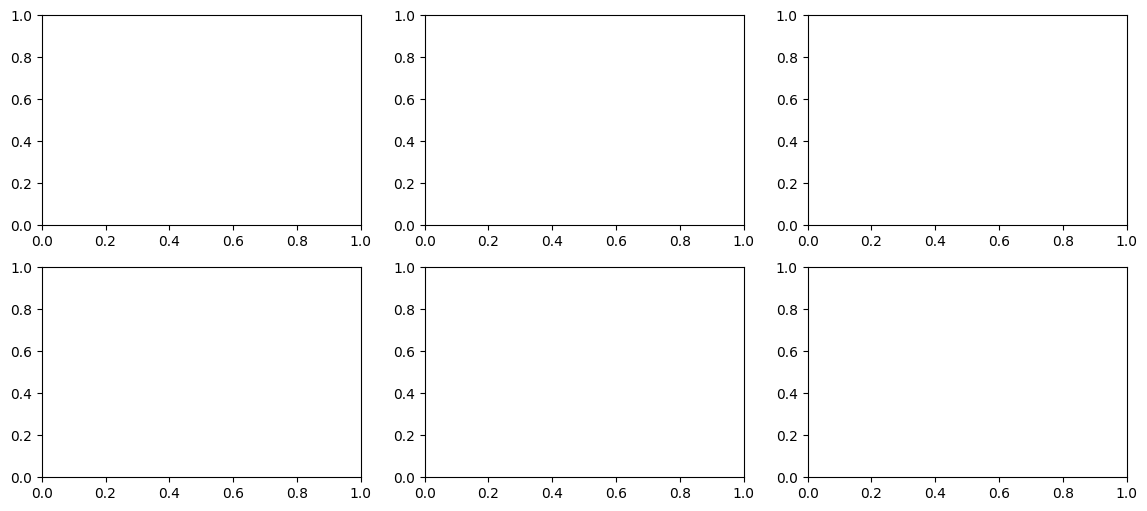

In [16]:

# Crear una figura con 2 filas y 3 columnas de ejes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

# Mostrar la figura resultante
plt.show()

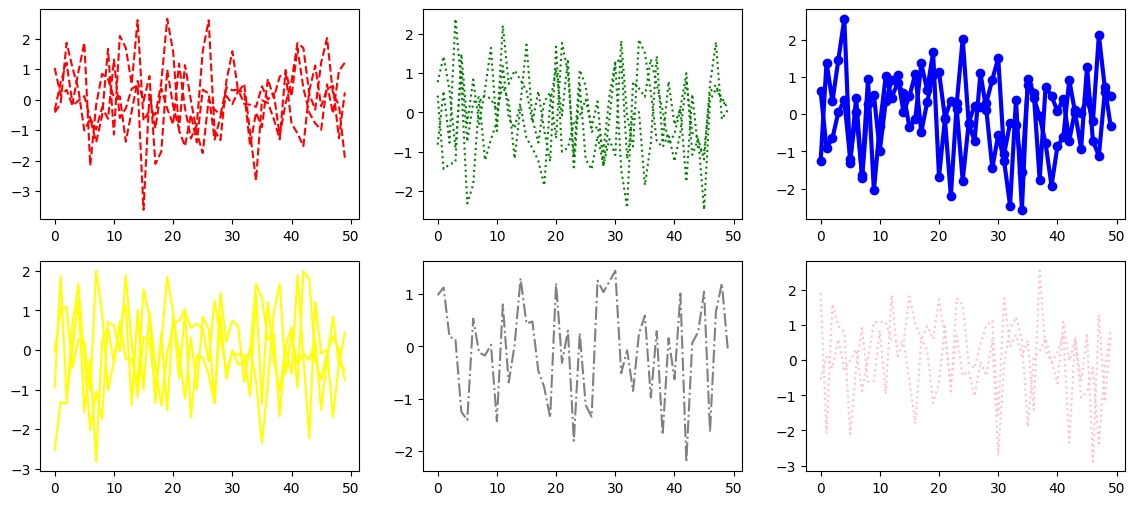

In [19]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax6.plot(np.random.randn(50), c='pink', linestyle=':')
ax5.plot(np.random.randn(50), c='gray', linestyle='-.')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

The "subplot2grid" command

There is another wat to make subplots using a grid-like format:

<ipython-input-20-e00fe4912fc0>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax5 = plt.subplot2grid((3,3), (2,0), colspan=2)


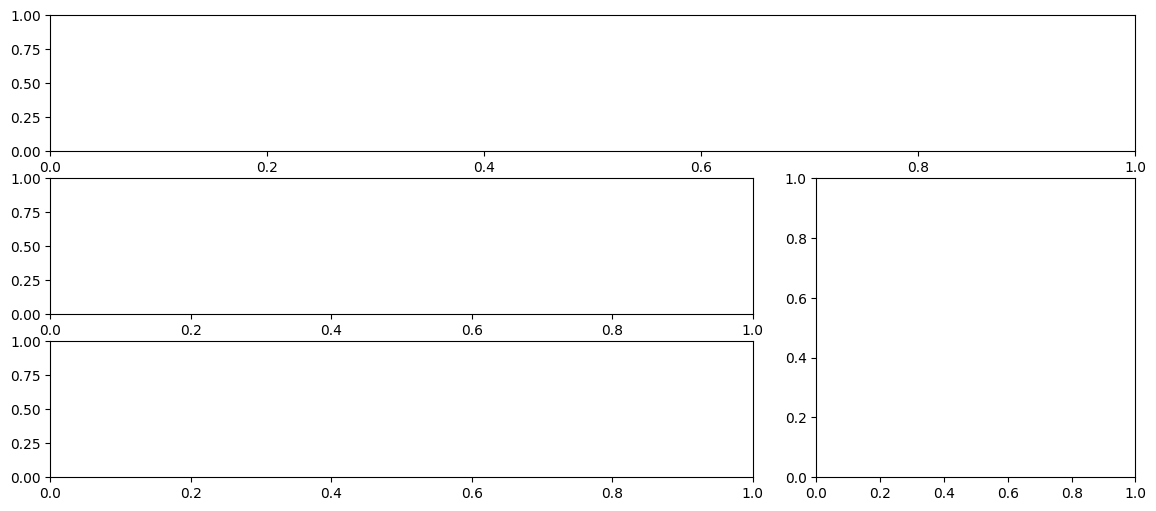

In [20]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
ax5 = plt.subplot2grid((3,3), (2,0), colspan=2)

Scatter plot

In [21]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

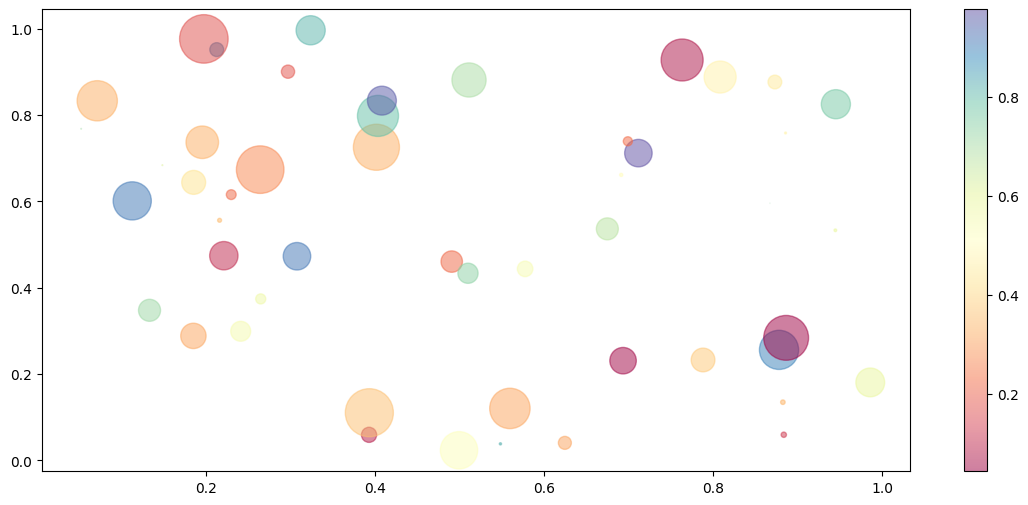

In [22]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

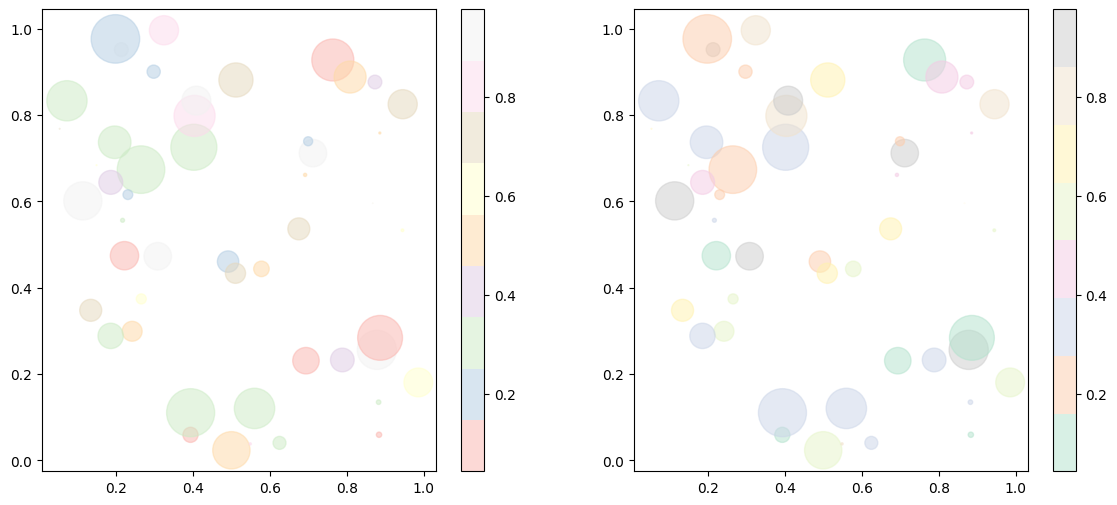

In [23]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

#Histograms

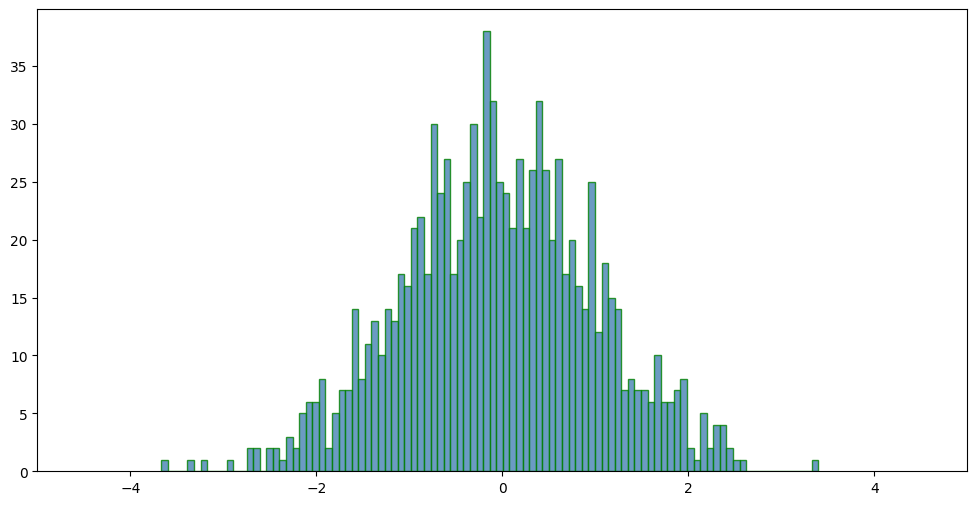

In [25]:
values = np.random.randn(1000)

plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [26]:
fig.savefig('hist.png')

#KDE (Kernel density estimation)

In [27]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

<ipython-input-27-67a840a934bd>:3: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(values)


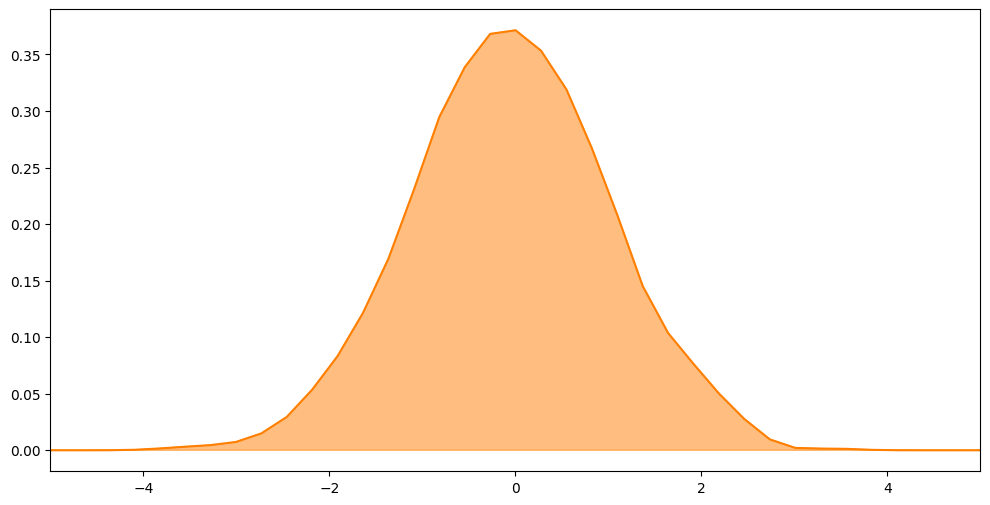

In [28]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

#Combine plots

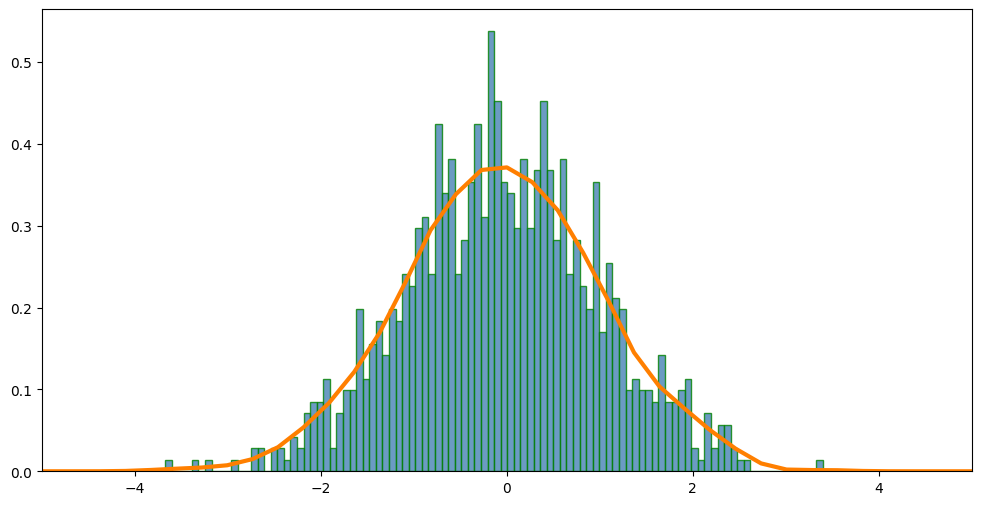

In [29]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

#Bar plots

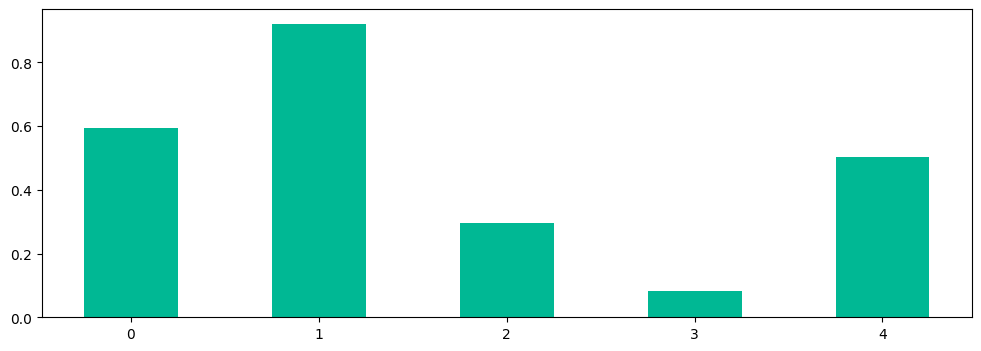

In [30]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

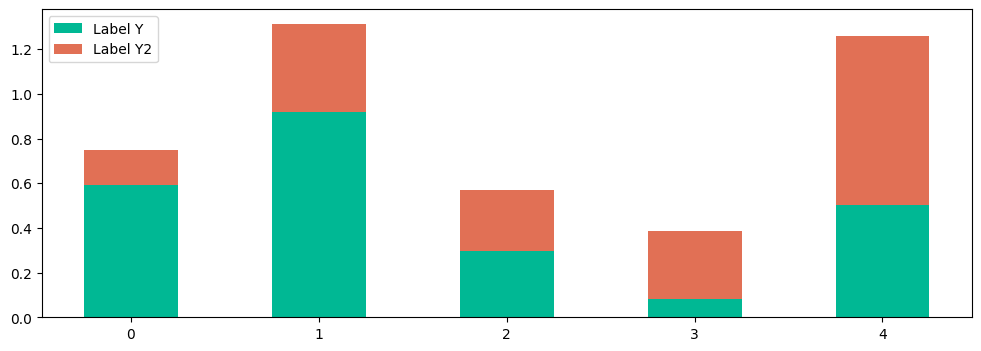

In [31]:
#Also can be stacked bars, and add a legend to the plot:


plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

#Boxplots and outlier detection

(array([1., 1., 0., 0., 6., 4., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

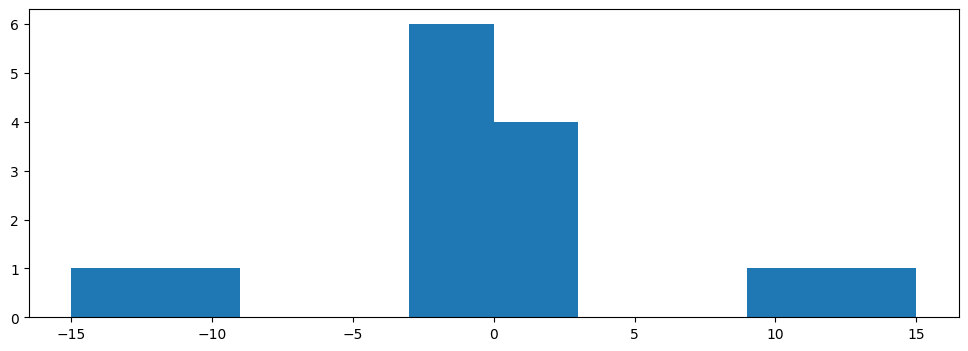

In [32]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe25e7741f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe25e774760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe260a6a0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe25e774b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe25e774e20>],
 'means': []}

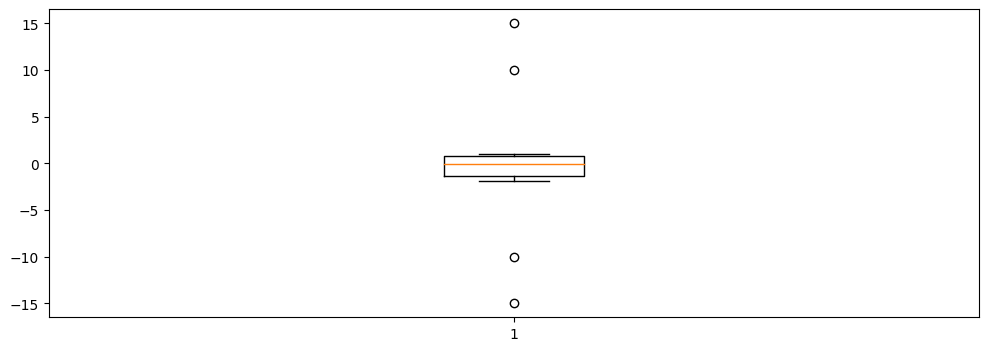

In [33]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)